In [1]:
ps = fits.open('../plane_ps2_09_01_19.fits')[1].data

In [2]:
#detcut = np.where((ps['ng'] > 0) & (ps['nr'] > 0) & (ps['ni'] > 0) & (ps['nz'] > 0) & (ps['ny'] > 0))
detcut = np.where((ps['ng'] > 0) & (ps['nr'] > 0) & (ps['ni'] > 0) & (ps['nz'] > 0) & (ps['ny'] > 0) & (ps['gMeanPSFMag'] > 0) & (ps['rMeanPSFMag'] > 0) & (ps['iMeanPSFMag'] > 0) & (ps['zMeanPSFMag'] > 0) & (ps['yMeanPSFMag'] > 0))
ps2 = ps[detcut]

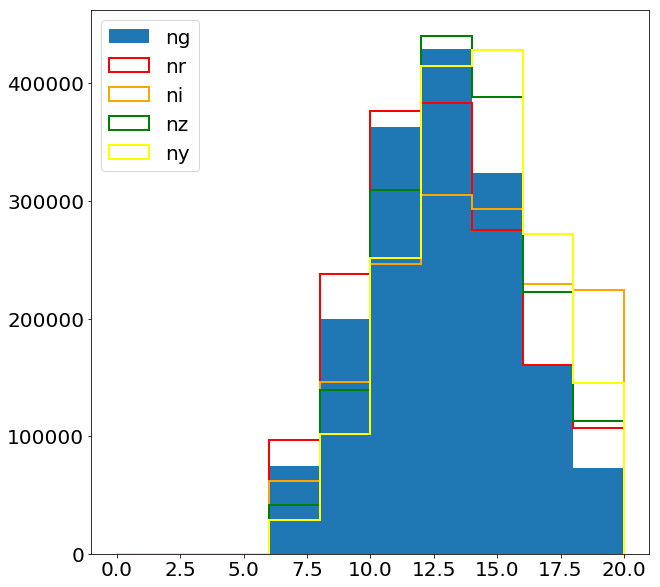

In [4]:
plt.hist(ps2['ng'], bins=10, range=[0,20], label='ng')
plt.hist(ps2['nr'], bins=10, range=[0,20], histtype='step', linewidth=2, stacked=True, color='red', label='nr')
plt.hist(ps2['ni'], bins=10, range=[0,20], histtype='step', linewidth=2, stacked=True, color='orange', label='ni')
plt.hist(ps2['nz'], bins=10, range=[0,20], histtype='step', linewidth=2, stacked=True, color='green', label='nz')
plt.hist(ps2['ny'], bins=10, range=[0,20], histtype='step', linewidth=2, stacked=True, color='yellow', label='ny')
plt.legend(loc=2)
plt.show()

In [6]:
psg = fits.open('../plane_gaia_ps2_08_06_19.fits')[1].data

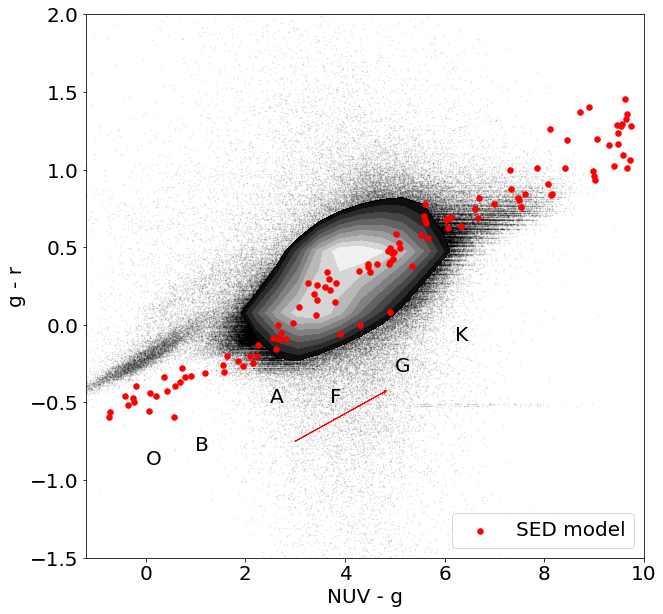

In [7]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
fig, ax = plt.subplots()
pickles = Table.read('../picklemags_laphare_final.txt', format='ascii')
scatter_contour(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30, zorder=20)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))

plt.annotate('O', xy=(0, -0.9), size=20)
plt.annotate('B', xy=(1, -0.81), size=20)
plt.annotate('A', xy=(2.5, -0.5), size=20)
plt.annotate('F', xy=(3.7, -0.5), size=20)
plt.annotate('G', xy=(5, -0.3), size=20)
plt.annotate('K', xy=(6.2, -0.1), size=20)
plt.xlabel('NUV - g')
plt.ylabel('g - r')
plt.arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
plt.legend(scatterpoints=1, loc=4)
plt.show()

# MS, WDs and binaries respectively
p1 = Polygon([[1.7, -0.5], [1.9, 0.3], [2.7, 0.7], [4, 1.05], [5.2, 1.05], [5.8, 1], [6.5, 0.95], [6.6, 0.3], [6, -0.1], [4.6, -0.4], [3.2, -0.5], [1.7, -0.5]])
p2 = Polygon([[-1, -0.6], [0.9, -0.25], [0.73, 0], [-1, -0.3], [-1, -0.6]])
p3 = Polygon([[1.7, -0.5], [1.9, 0.3], [2.7, 0.7], [4, 1.05], [5.2, 1.05], [5.8, 1], [6.5, 0.95], [6.5, 2], [-2.1, 2], [-2.1, 0.5], [1.9, 0.3]])

patches = [p1, p2, p3]
p = PatchCollection(patches, alpha=0.3, cmap=matplotlib.cm.jet)
p.set_array(np.array([100, 50, 80]))
#p.set_array(np.array(100.*np.random.rand(3)))
ax.add_collection(p)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


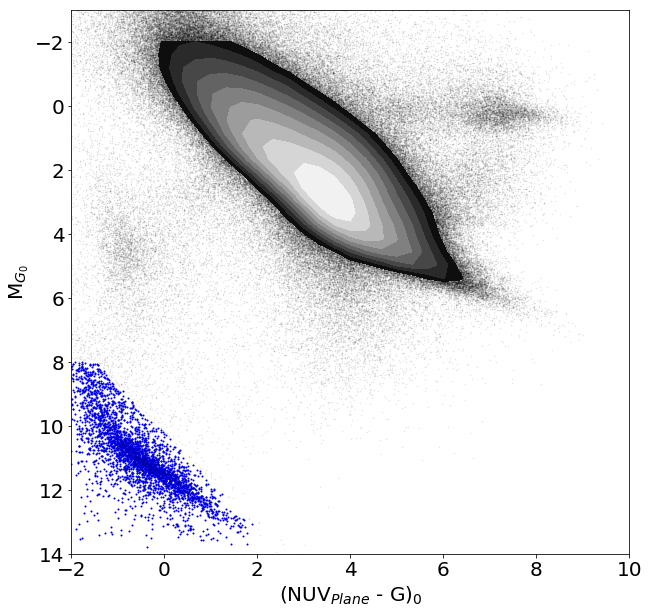

In [8]:
threshold = 1000
bins = 40
nuvg = (psg['nuv']-psg['ebv']*7.24)-(psg['phot_g_mean_mag']-psg['ebv']*2.85)
mg = psg['phot_g_mean_mag']-psg['distmod']-psg['ebv']*2.85

wdcut = np.where((nuvg < 2) & (mg > 8))
wds = psg[wdcut]

nuvgwd = nuvg[wdcut]
mgwd = mg[wdcut]

m = (12.-8.)/(1.2+1.5)
b = 12-1.2*m

cut2 = np.where(mg[wdcut] > nuvg[wdcut]*m+b)
wds = wds[cut2]

scatter_contour(nuvg, mg, threshold=threshold, log_counts=True, histogram2d_args=dict(bins=bins, range=[[-1,12], [-2,14]]), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray, zorder=10))

plt.scatter(nuvgwd[cut2], mgwd[cut2], s=1,c='blue', label='WDs')
plt.xlabel('(NUV$_{Plane}$ - G)$_{0}$')
plt.ylabel('M$_{G_0}$')
plt.xlim((-2, 10))
plt.ylim((14, -3))
plt.show()

In [95]:
psg = psg[np.where(psg['ebv'] > 0)]
pickles = Table.read('../picklemags_laphare_final.txt', format='ascii')
obcut = np.where((mg < -0.5) & (mg > -2) & (nuvg > 0) & (nuvg < 1))
ob = psg[obcut]
nuvg = (psg['nuv']-psg['ebv']*7.24)-(psg['phot_g_mean_mag']-psg['ebv']*2.85)
mg = psg['phot_g_mean_mag']-psg['distmod']-psg['ebv']*2.85

wdcut = np.where((nuvg < 2) & (mg > 8))
wds = psg[wdcut]

nuvgwd = nuvg[wdcut]
mgwd = mg[wdcut]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


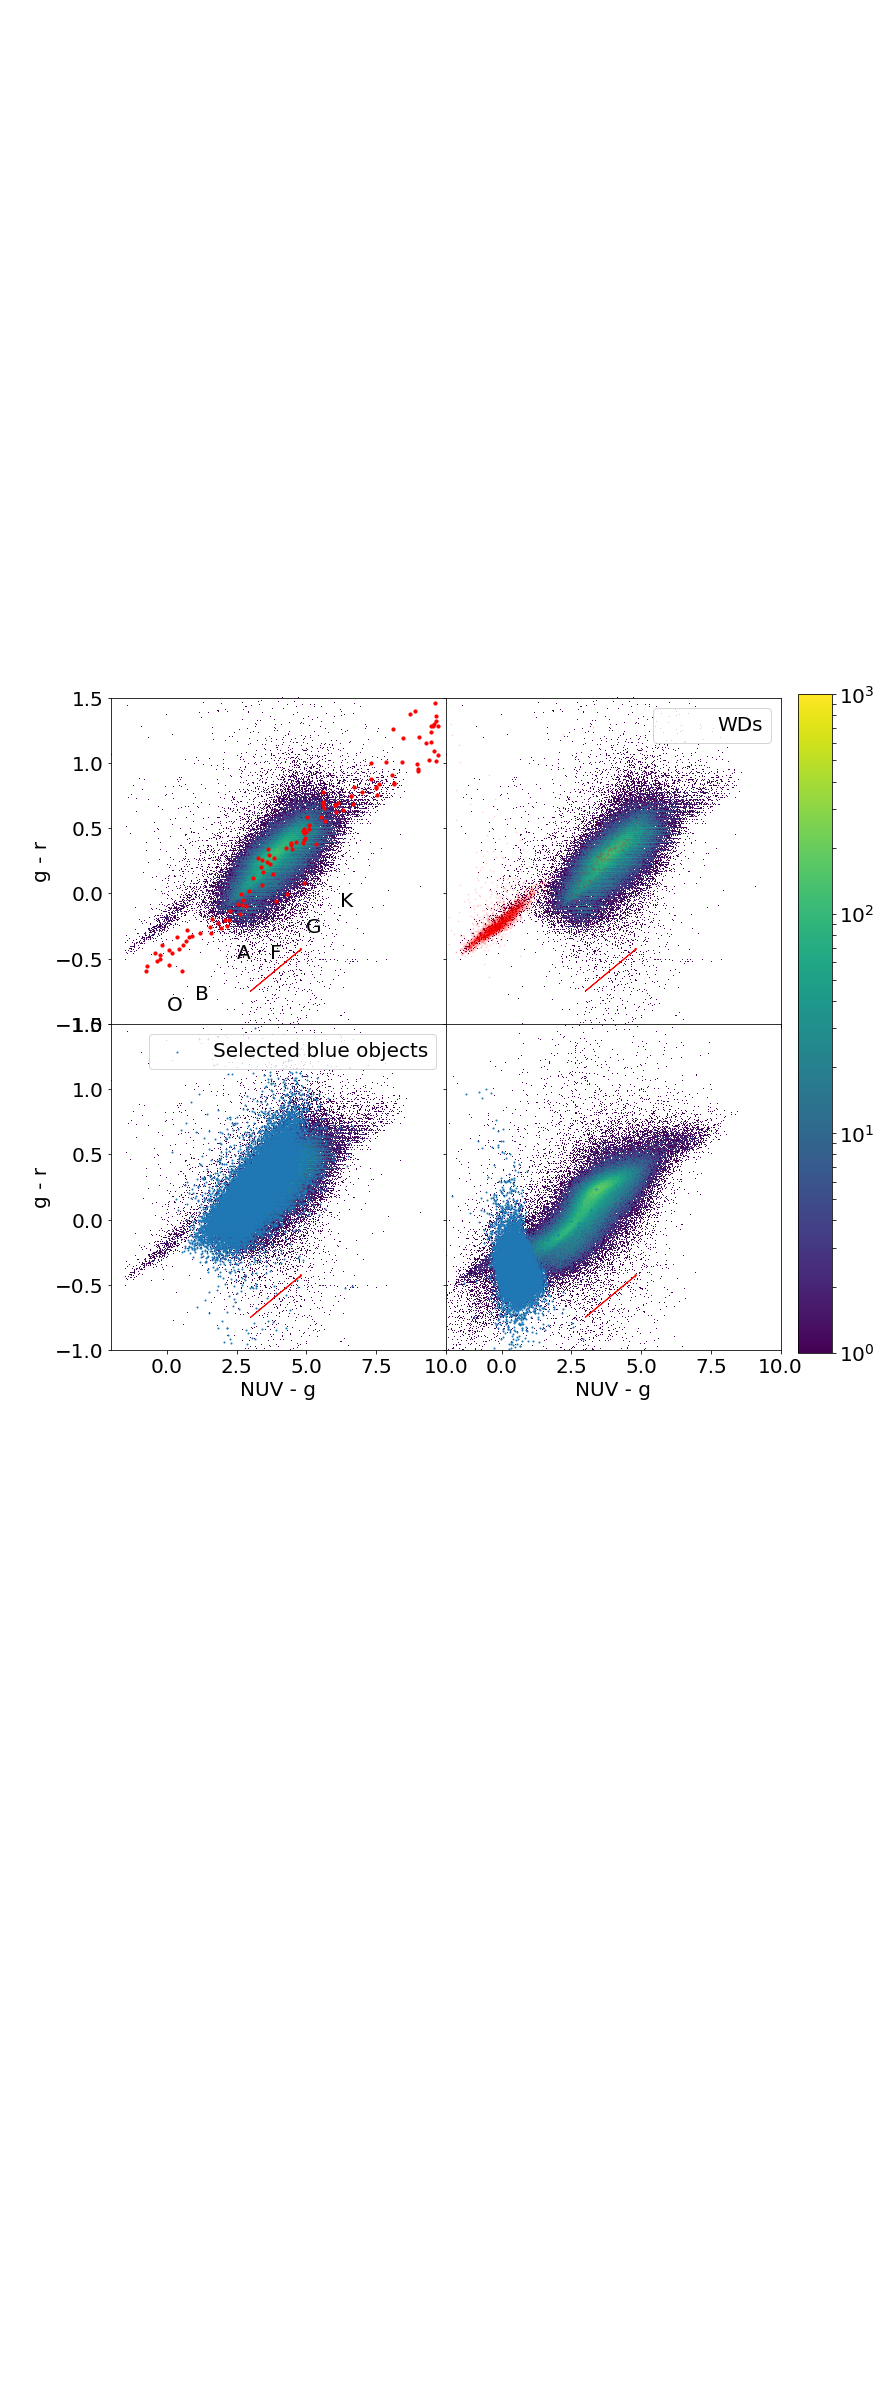

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,12))

im1 = axes[0, 0].hist2d(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], bins=(3000,3000),vmin=1, vmax=1000, norm=matplotlib.colors.LogNorm())
axes[0, 0].scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=10, zorder=20)

axes[0, 1].hist2d(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], bins=(3000,3000),vmin=1, vmax=1000, norm=matplotlib.colors.LogNorm())
axes[0, 1].scatter((psg['nuv']-psg['gMeanPSFMag'])[wdcut][cut2], (psg['gMeanPSFMag']-psg['rMeanPSFMag'])[wdcut][cut2], s=1, c='red', alpha=0.1, label='WDs')
axes[1, 0].hist2d(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], bins=(3000,3000),vmin=1, vmax=1000, norm=matplotlib.colors.LogNorm())
axes[1, 0].scatter(ob['nuv']-ob['gMeanPSFMag'], ob['gMeanPSFMag']-ob['rMeanPSFMag'], s=1, label='Selected blue objects')

axes[1, 1].hist2d((psg['nuv']-psg['ebv']*7.24)-(psg['gMeanPSFMag']-psg['ebv']*3.172), (psg['gMeanPSFMag']-psg['ebv']*3.172)-(psg['rMeanPSFMag']-psg['ebv']*2.271), bins=(3000,3000),vmin=1, vmax=1000, norm=matplotlib.colors.LogNorm())
axes[1, 1].scatter((ob['nuv']-ob['ebv']*7.24)-(ob['gMeanPSFMag']-ob['ebv']*3.172), (ob['gMeanPSFMag']-ob['ebv']*3.172)-(ob['rMeanPSFMag']-ob['ebv']*2.271), s=1, label='Selected blue objects')

axes[0, 0].set_xlim(-2, 10)
axes[0, 1].set_xlim(-2, 10)
axes[0, 0].set_ylim(-1, 1.5)
axes[0, 1].set_ylim(-1, 1.5)
fig.subplots_adjust(hspace=0, wspace=0)
fig.colorbar(im1[3], cax=fig.add_axes([0.92, 0.122, 0.04, 0.762]))

axes[0, 0].annotate('O', xy=(0, -0.9), size=20)
axes[0, 0].annotate('B', xy=(1, -0.81), size=20)
axes[0, 0].annotate('A', xy=(2.5, -0.5), size=20)
axes[0, 0].annotate('F', xy=(3.7, -0.5), size=20)
axes[0, 0].annotate('G', xy=(5, -0.3), size=20)
axes[0, 0].annotate('K', xy=(6.2, -0.1), size=20)
axes[1, 1].set_xlabel('NUV - g')
axes[1, 0].set_xlabel('NUV - g')
axes[0, 0].set_ylabel('g - r')
axes[1, 0].set_ylabel('g - r')
axes[0, 1].legend(scatterpoints=1)
axes[1, 0].legend(scatterpoints=1, loc=1)
axes[0, 0].arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
axes[0, 1].arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
axes[1, 0].arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
axes[1, 1].arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
plt.show()

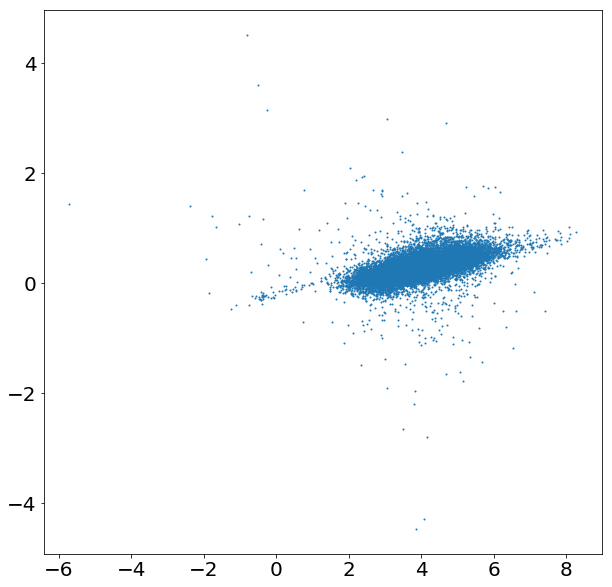

In [100]:
plt.scatter(ob['nuv']-ob['gMeanPSFMag'], ob['gMeanPSFMag']-ob['rMeanPSFMag'], s=1, label='Selected blue objects')
plt.show()

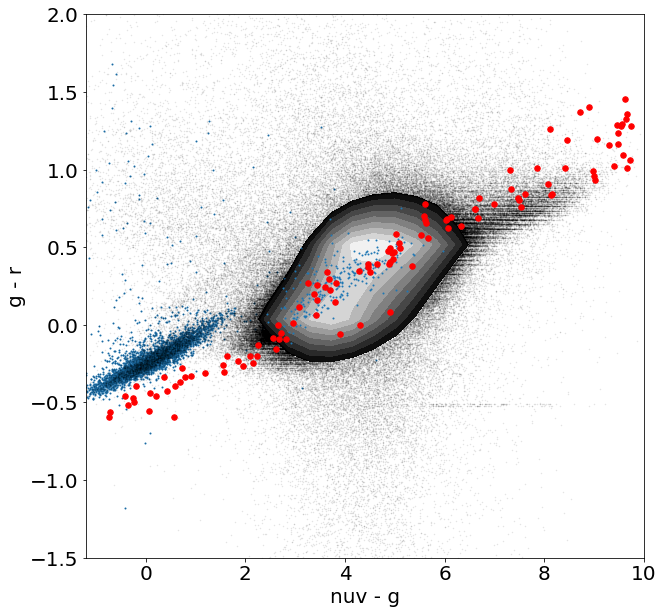

In [17]:
scatter_contour(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30, zorder=20)
plt.scatter(wds['nuv']-wds['gMeanPSFMag'], wds['gMeanPSFMag']-wds['rMeanPSFMag'],s=1)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))
plt.xlabel('nuv - g')
plt.ylabel('g - r')
plt.show()

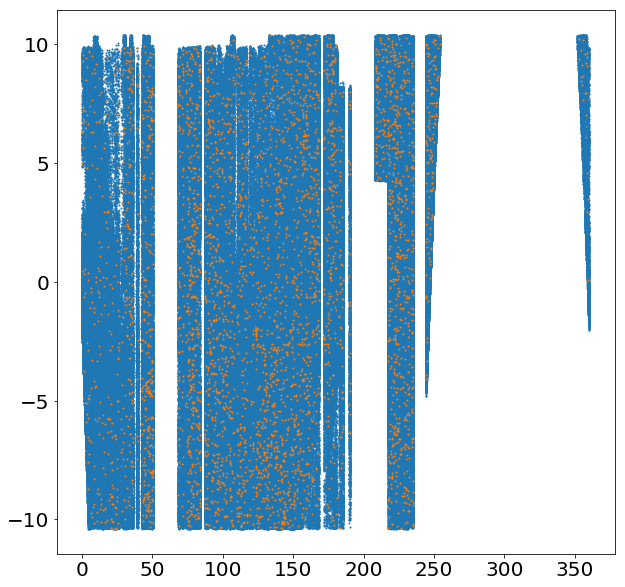

In [19]:
plt.scatter(psg['gl'], psg['gb'], s=1)
plt.scatter(wds['gl'], wds['gb'], s=1)
plt.show()

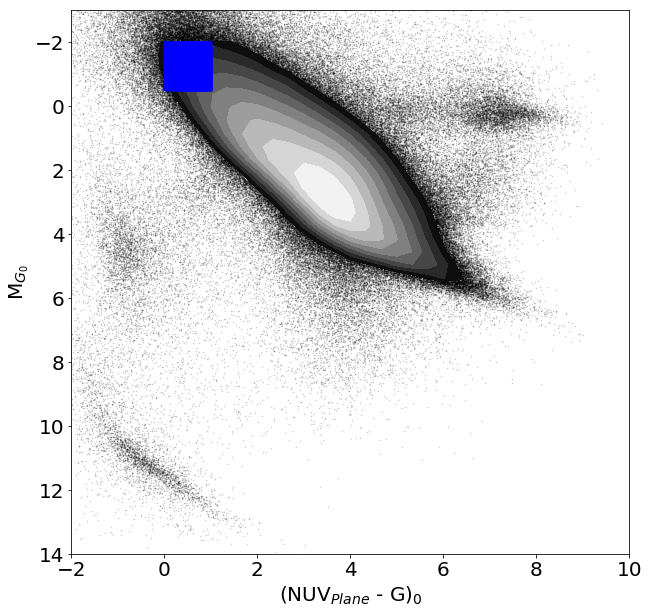

In [103]:
obcut = np.where((mg < -0.5) & (mg > -2) & (nuvg > 0) & (nuvg < 1))
ob = psg[obcut]

scatter_contour(nuvg, mg, threshold=threshold, log_counts=True, histogram2d_args=dict(bins=bins, range=[[-1,12], [-2,14]]), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray, zorder=10))

plt.scatter(nuvg[obcut], mg[obcut], s=1,c='blue', label='WDs', zorder=10)
plt.xlabel('(NUV$_{Plane}$ - G)$_{0}$')
plt.ylabel('M$_{G_0}$')
plt.xlim((-2, 10))
plt.ylim((14, -3))
plt.show()


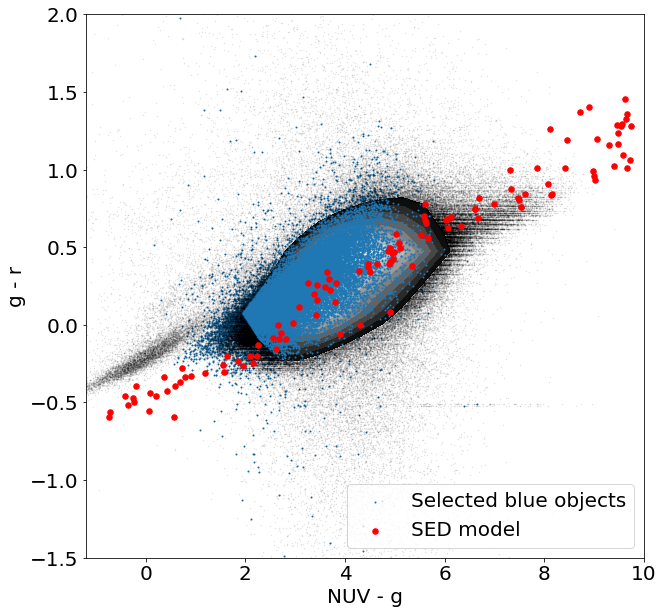

In [104]:
scatter_contour(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter(ob['nuv']-ob['gMeanPSFMag'], ob['gMeanPSFMag']-ob['rMeanPSFMag'],s=1, label='Selected blue objects')
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30, zorder=20)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))
plt.xlabel('NUV - g')
plt.ylabel('g - r')
plt.legend(loc=4, scatterpoints=1)
plt.show()

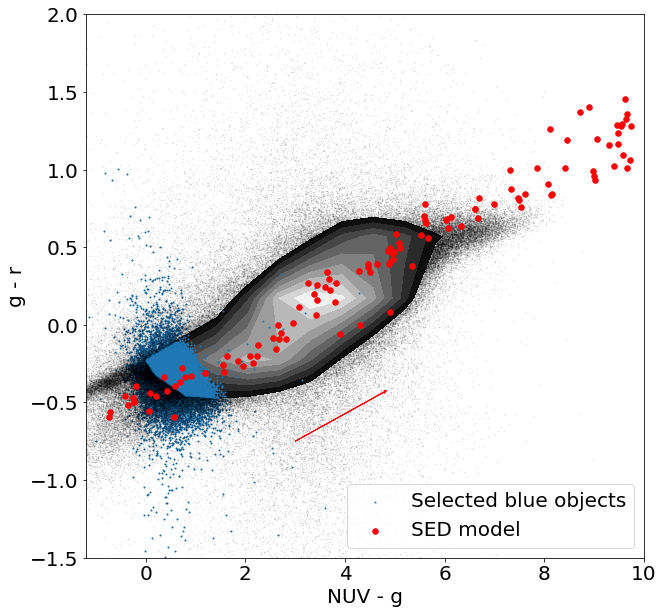

In [105]:
ebvcut = np.where(psg['ebv']> 0)

scatter_contour(((psg['nuv']-psg['ebv']*7.24)-(psg['gMeanPSFMag']-psg['ebv']*3.172))[ebvcut], ((psg['gMeanPSFMag']-psg['ebv']*3.172)-(psg['rMeanPSFMag']-psg['ebv']*2.271))[ebvcut], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter((ob['nuv']-ob['ebv']*7.24)-(ob['gMeanPSFMag']-ob['ebv']*3.172), (ob['gMeanPSFMag']-ob['ebv']*3.172)-(ob['rMeanPSFMag']-ob['ebv']*2.271), s=1, label='Selected blue objects')
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30, zorder=20)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))
plt.xlabel('NUV - g')
plt.ylabel('g - r')
plt.arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
plt.legend(loc=4, scatterpoints=1)
plt.show()

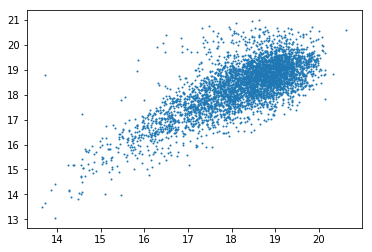

In [13]:
plt.scatter(wds['nuv'], wds['phot_g_mean_mag'], s=1)

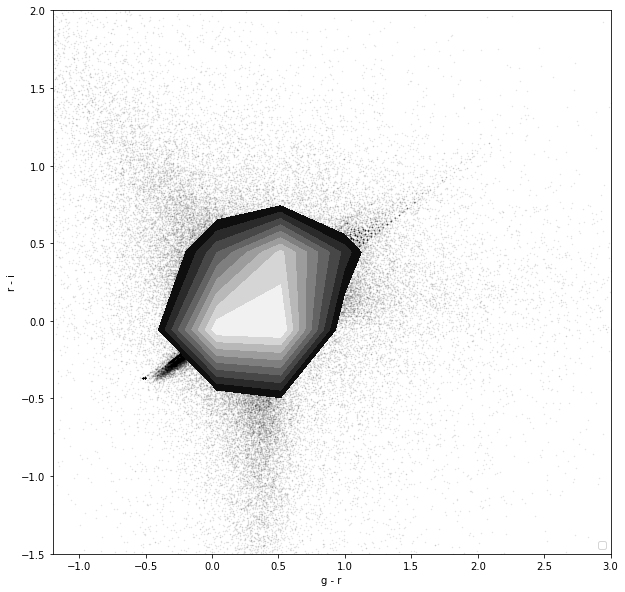

In [29]:
fig = plt.figure(figsize=(10,10))
scatter_contour(psg['gMeanPSFMag']-psg['rMeanPSFMag'], psg['rMeanPSFMag']-psg['iMeanPSFMag'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
#plt.scatter(wds['gMeanPSFMag']-wds['rMeanPSFMag'], wds['rMeanPSFMag']-wds['iMeanPSFMag'], s=1, zorder=10)
plt.xlim((-1.2, 3))
plt.ylim((-1.5, 2))
plt.xlabel('g - r')
plt.ylabel('r - i')
plt.legend(loc=4, scatterpoints=1)
plt.show()

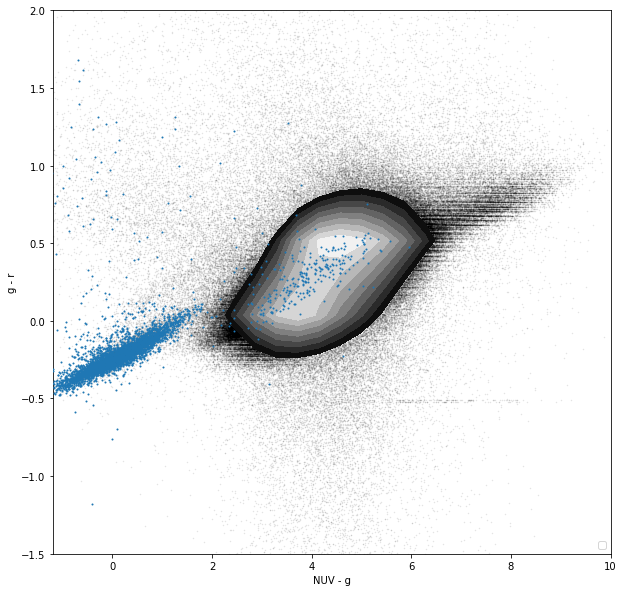

In [28]:
fig = plt.figure(figsize=(10,10))
scatter_contour(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter(wds['nuv']-wds['gMeanPSFMag'], wds['gMeanPSFMag']-wds['rMeanPSFMag'], s=1, zorder=10)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))
plt.xlabel('NUV - g')
plt.ylabel('g - r')
plt.legend(loc=4, scatterpoints=1)
plt.show()